# R Coding Assignment \#4: Discrete Random Variables

### Sheetal Parikh
EN.605.631.81<br>
September 27, 2020
***
***

## Problem 1
A tetrahedron (four-sided die with outcomes 1, 2, 3, 4) is rolled twice. Let X equal the sum of the two outcomes making the possible values of X, 2, 3, 4, 5, 6, 7, 8. Dataset A2_data1.txt is the outcome of the experiment conducted 1000 times.  Create a table titled, "Sum of Two Tetrahedral Dice" that consists of four columns as follows.

Col1: x - the sum of the outcomes (i.e. 2, 3, 4, etc.)

Col2: Number of Observations of x

Col3: Relative Frequency of x

Col4: Probability of {X=x}

Since we have a 4 sided die, we know that the possible outcomes of X are, 2, 3, 4, 5, 6, 7, and 8.  These possible outcomes will be column 1 of the tables.  Column 2 of the table will be the number of each sum observed in the experiment. The relative frequency, or column 3 of the table, will be the probability of each sum based on the results of the experiment. Column 4 of the table, the probability of {X=x}, will be the actual probability of getting one of the sums.

In [15]:
###### Determining probabilities for Column 4 #################
###############################################################

#the different possible sums of rolling 2 tetrahedral dice
row1 <- c(2,3,4,5)
row2 <- c(3,4,5,6)
row3 <- c(4,5,6,7)
row4 <- c(5,6,7,8)

#creating matrix of possible sums
possibleSums <-matrix(c(row1,row2,row3,row4),nrow=4,byrow=TRUE)

#creating table of possible sums
a <-table(possibleSums)

#calculating probabiliites for the possible sums - we know that the sample space will be 4^2 = 16 possible sums
S <- 4^2
prob1 <- 0
prob2 <- a[names(a)==2]/S
prob3 <- a[names(a)==3]/S
prob4 <- a[names(a)==4]/S
prob5 <- a[names(a)==5]/S
prob6 <- a[names(a)==6]/S
prob7 <- a[names(a)==7]/S
prob8 <- a[names(a)==8]/S

#creating vector of probabilities
allProbs<- c(prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8)

###### Creating Table with 4 Columns #####################
#########################################################

#reading in data A4_data1.txt as given for the problem
data1 <- read.table("A4_data1.txt",header=TRUE,sep="")
result <- data1$x

#creates list of different sum ranges
bins <- seq(0,8,by=1) 

#grouping data into bins
Sums <- cut(result,bins)

#creating table of the sums and frequencies of each sum
prob1<-table(Sums)
transform(prob1)

#creating table with the range of sums, the frequency of each sum, the relative frequency, 
#and the actual calculated probability of each sum
finalTable <- transform(prob1, Rel_freq=prop.table(Freq), Prob = prop.table(allProbs))

#printing table with a title
printTable <- function(x){
  cat("  Sum of Two Tetrahedral Dice\n")
  x
}

print(printTable(finalTable))



Sums,Freq
"(0,1]",0
"(1,2]",71
"(2,3]",124
"(3,4]",194
"(4,5]",258
"(5,6]",177
"(6,7]",122
"(7,8]",54


  Sum of Two Tetrahedral Dice
   Sums Freq Rel_freq   Prob
  (0,1]    0    0.000 0.0000
2 (1,2]   71    0.071 0.0625
3 (2,3]  124    0.124 0.1250
4 (3,4]  194    0.194 0.1875
5 (4,5]  258    0.258 0.2500
6 (5,6]  177    0.177 0.1875
7 (6,7]  122    0.122 0.1250
8 (7,8]   54    0.054 0.0625


As can be seen in the table above, the first column is the possible sum.  It is shown as a range of the sum. The square bracket demonstrates that the number is included in the range.  For example, (0,1] means between 0-1 and including 1. Because a fractional sum is not possible, (0,1] means the observance of 1.  Also, since a sum of 1 is not possible, there were no 0's observed. Column 2 is the frequency of the number of the sums observed. The relative frequency is the percentage of the sum observed in the experiment.  The last column, Prob, is the actual probability of getting one of the possible sums.

## Problem 2
Create a probabilistic histogram of the p.m.f of X, (Col4 of your table), and superimpose it over a shaded histogram that represents the observed relative frequencies, (Col3 of your table), for the corresponding values. Choose color shading that allow both histograms to be observed on the same graph.

a. Histogram of the p.m.f of X or Column 4 of the table.

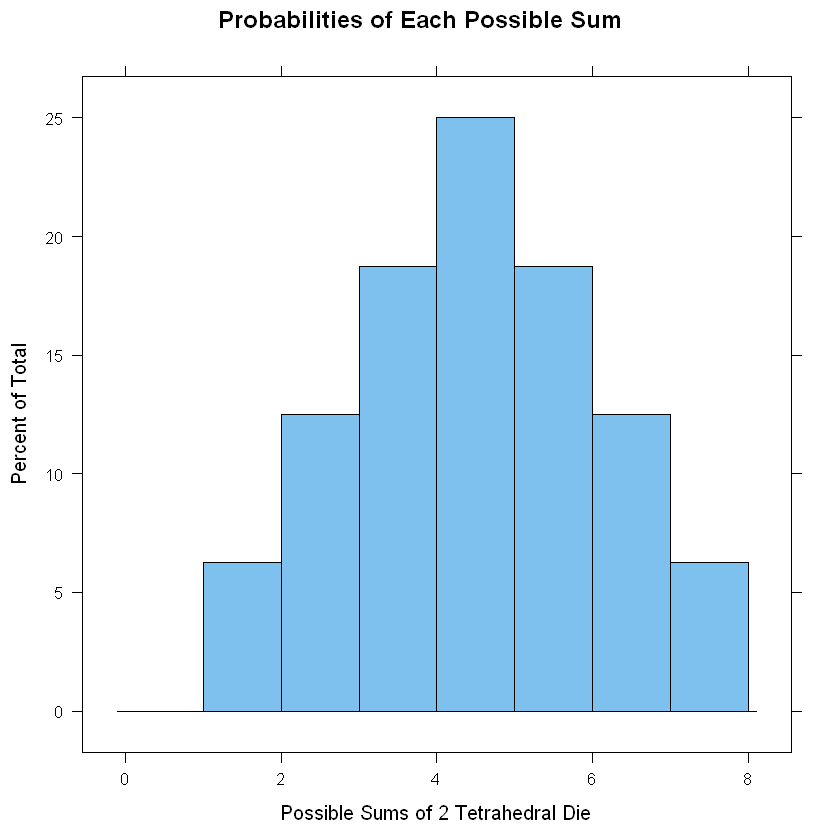

In [16]:
#Creating histogram of p.m.f of X (Col4 of table) from Problem 1
#install.packages("lattice")
library(lattice)

data2 <- c(row1,row2,row3,row4)

mybins1 <- c(0,1,2,3,4,5,6,7,8)
histogram(data2, type = "percent",
          main = "Probabilities of Each Possible Sum",
          xlab = "Possible Sums of 2 Tetrahedral Die",
          col = "skyblue2",
          breaks = mybins1)

b.) Histogram of observed relative frequencies (Column 3 of Table)

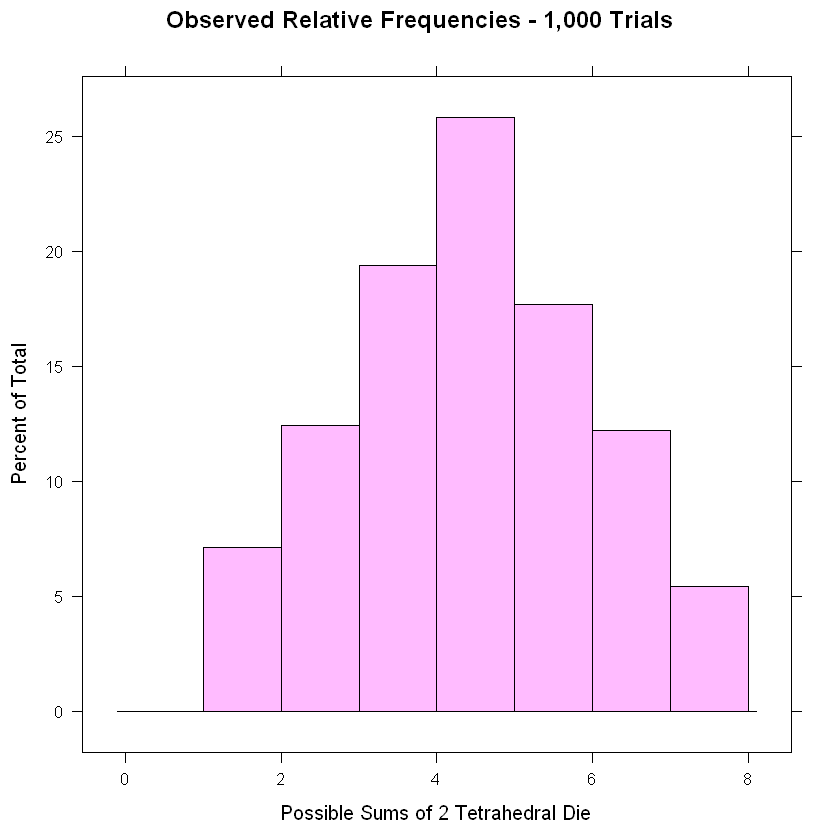

In [17]:
#Creating histogram of observed relative frequencies (Column 3 of Table) from Problem 1

data3 <- c(result)

histogram(data3, type = "percent",
          main = "Observed Relative Frequencies - 1,000 Trials",
          xlab = "Possible Sums of 2 Tetrahedral Die",
          col = "plum1",
          breaks = mybins1)

c.) Superimposed Histogram (Combined Histogram of Histogram in part a and in part b)

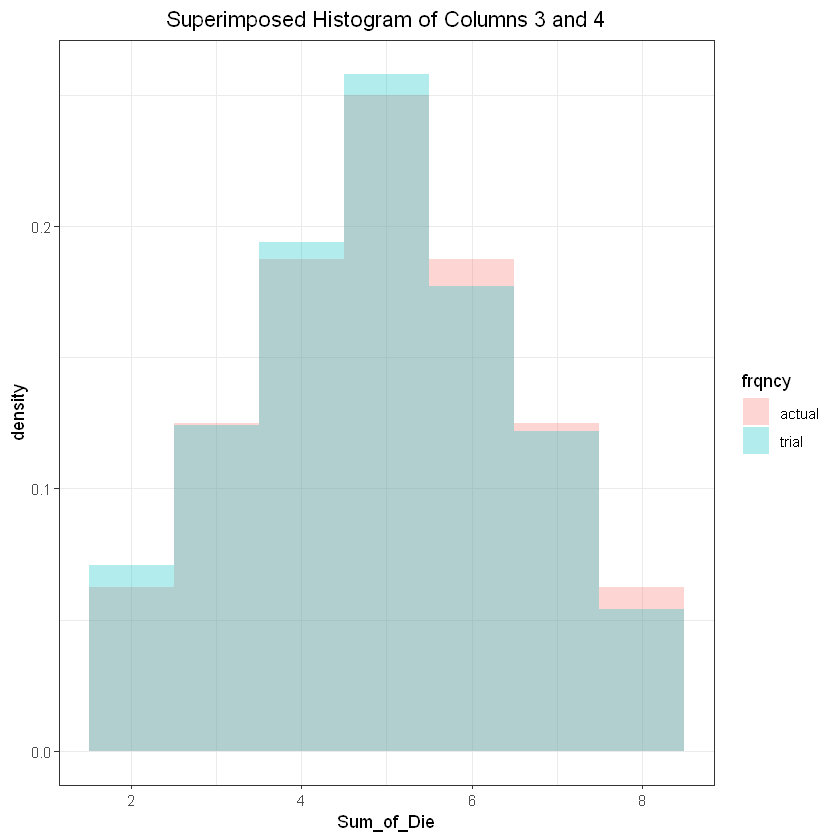

In [18]:
#Creating Superimposed Histogram
#install.packages("ggplot2")
library(ggplot2)

#creating data sets
actual <- data.frame(Sum_of_Die = data2)
trial <- data.frame(Sum_of_Die = data3)

# combining dataframes into one by making new column for identifying variable 
actual$frqncy <- 'actual'
trial$frqncy <- 'trial'

# combined into one dataframe
frequencies <- rbind(actual, trial)

#plotting histogram
#theme helps center adjust the title of the histogram
#alpha adjusts the transparency of the histogram colors
#density makes the histogram based on relative frequency
ggplot(frequencies, aes(Sum_of_Die, fill = frqncy)) + 
  ggtitle("Superimposed Histogram of Columns 3 and 4") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5)) +
  geom_histogram(alpha = 0.3, aes(y = ..density..), position = 'identity', bins = 7) 



As can be seen in the histogram above, with 1,000 trials, the relative frequency of the sums in the experiement is close but does not exactly match the actual probabilities of each sum.

## Problem 3
Write a function called, 'Roll', to simulate the tetrahedron dice experiment 100,000 times and repeat the table and histograms from problem 1 and 2. What do you notice as the number of trials increase?

a.) Simulating tetrahedron dice experiment 100,000 times

In [19]:
#writing function "Roll" for simulating tetrahedron dice n times
Roll <- function(n){
    sample(1:4,n,replace=TRUE) + sample(1:4,n,replace=TRUE)
}

#simulation of tetrahedron dice 100,000 times
simulation <- Roll(100000)

b.) Printing Table similar to Problem 2

In [20]:
#Printing Table

#creates list of different sum ranges
bins3 <- seq(0,8,by=1) 

#grouping data into bins
Sums3 <- cut(simulation,bins3)

#creating table of the sums and frequencies of each sum
prob3<-table(Sums3)
transform(prob3)

#creating table with the range of sums, the frequency of each sum, the relative frequency, 
#and the actual calculated probability of each sum
finalTable3 <- transform(prob3, Rel_freq=prop.table(Freq), Prob = prop.table(allProbs))

print(printTable(finalTable3))

Sums3,Freq
"(0,1]",0
"(1,2]",6235
"(2,3]",12431
"(3,4]",18892
"(4,5]",24965
"(5,6]",18868
"(6,7]",12376
"(7,8]",6233


  Sum of Two Tetrahedral Dice
  Sums3  Freq Rel_freq   Prob
  (0,1]     0  0.00000 0.0000
2 (1,2]  6235  0.06235 0.0625
3 (2,3] 12431  0.12431 0.1250
4 (3,4] 18892  0.18892 0.1875
5 (4,5] 24965  0.24965 0.2500
6 (5,6] 18868  0.18868 0.1875
7 (6,7] 12376  0.12376 0.1250
8 (7,8]  6233  0.06233 0.0625


c.) Printing Histograms

Histogram of the probabiliites of each possible Sum - Column 4 of table

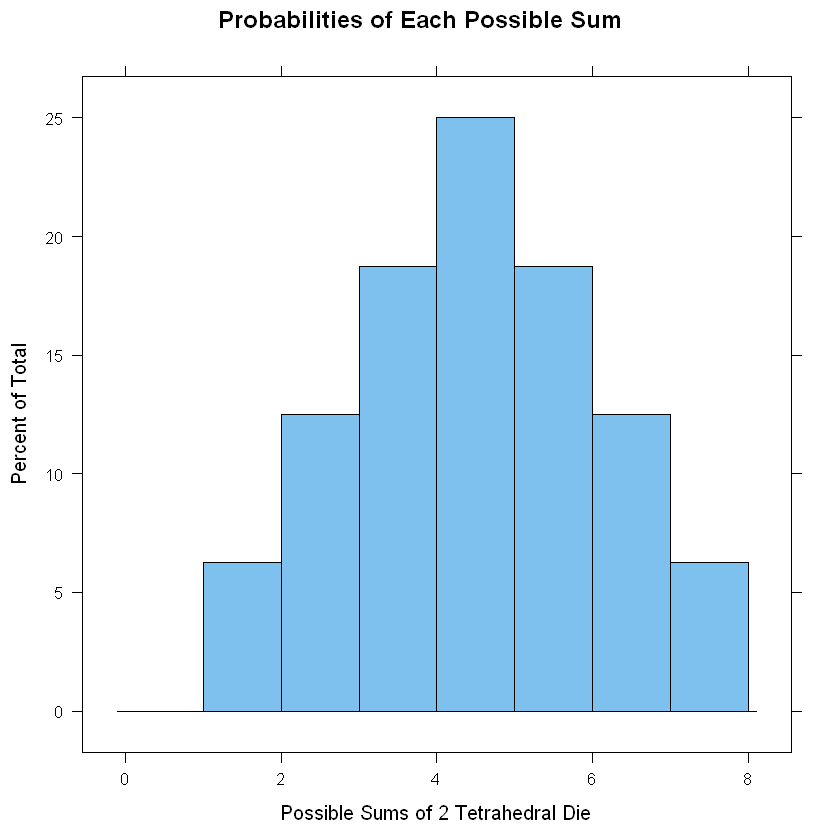

In [12]:
#Printing Histograms

#Creating histogram of p.m.f of X (Col4 of table) from this Problem(Same as Problem1)
#install.packages("lattice")
library(lattice)

prob3data2 <- c(row1,row2,row3,row4)

histogram(prob3data2, type = "percent",
          main = "Probabilities of Each Possible Sum",
          xlab = "Possible Sums of 2 Tetrahedral Die",
          col = "skyblue2",
          breaks = mybins1)

This histogram is the same histogram for Column 4 as shown in problem 2.  The actual probability of getting a specific sum does not change.

Histogram of the observed relative frequences - Column 3 of table

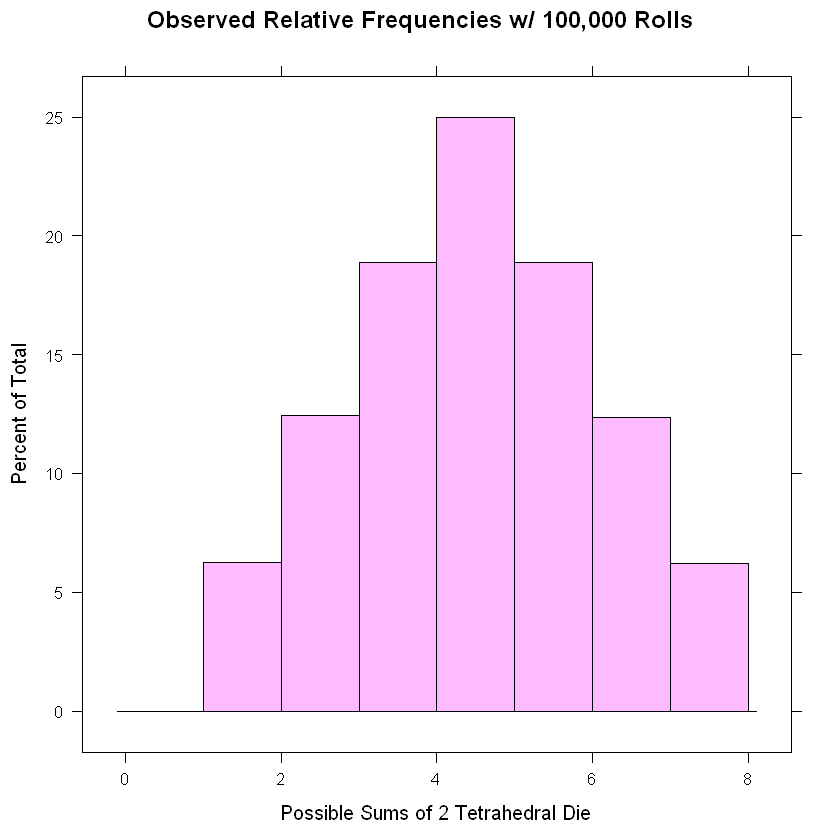

In [21]:
#Creating histogram of observed relative frequencies (Column 3 of Table) from this Problem - 100,000 trials

prob3data3 <- c(simulation)

histogram(prob3data3, type = "percent",
          main = "Observed Relative Frequencies w/ 100,000 Rolls",
          xlab = "Possible Sums of 2 Tetrahedral Die",
          col = "plum1",
          breaks = mybins1)

The histogram of the relative frequency using 100,000 rolls appears to be very similar to the histogram of the actual probailities of each sum.

Superimposed Histogram 

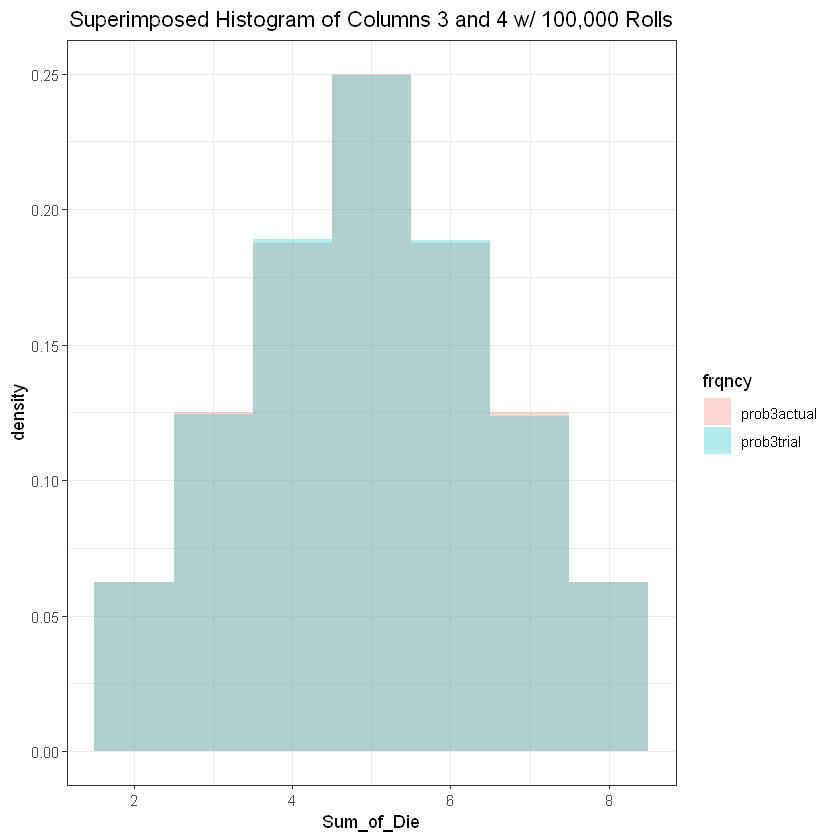

In [22]:
#Creating Superimposed Histogram
#install.packages("ggplot2")
library(ggplot2)

#creating data sets
prob3actual <- data.frame(Sum_of_Die = prob3data2)
prob3trial <- data.frame(Sum_of_Die = prob3data3)

# combining dataframes into one by making new column for identifying variable 
prob3actual$frqncy <- 'prob3actual'
prob3trial$frqncy <- 'prob3trial'

# combined into one dataframe
prob3frequencies <- rbind(prob3actual, prob3trial)

#plotting histogram
#theme helps center adjust the title of the histogram
#alpha adjusts the transparency of the histogram colors
#density makes the histogram based on relative frequency
ggplot(prob3frequencies, aes(Sum_of_Die, fill = frqncy)) + 
  ggtitle("Superimposed Histogram of Columns 3 and 4 w/ 100,000 Rolls") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5)) +
  geom_histogram(alpha = 0.3, aes(y = ..density..), position = 'identity', bins = 7) 

As the number of trials increase, the relative frequency begins to match the actual probabilities of the sum of dice.  Both histograms have almost completely overlapped.  

## References

Problem 1:

https://r.789695.n4.nabble.com/Adding-summary-title-to-table-td4642094.html

https://rpubs.com/careybaldwin/346995

https://cosmosweb.champlain.edu/people/stevens/WebTech/R/Chapter-3-R.pdf

Problems 2 and 3:

https://cosmosweb.champlain.edu/people/stevens/WebTech/R/Chapter-3-R.pdf

https://rpubs.com/CamilleFairbourn/307794

https://stackoverflow.com/questions/45346885/center-plot-title-in-ggplot2-using-theme-bw

https://stackoverflow.com/questions/3541713/how-to-plot-two-histograms-together-in-r
